In [1]:
import pandas as pd

raw = pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/cards.parquet")

legality = pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/cardLegalities.parquet")

df = raw.loc[
    lambda df: df.availability.str.contains("arena") & df.colors.str.contains(pat="W|G") | (df.colors == "")
].merge(legality.loc[lambda df: df.standard.apply(lambda x: x is not None), ["uuid", "standard"]], on="uuid")

In [2]:
raw.head()

,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,colors,defense,duelDeck,edhrecRank,edhrecSaltiness,...,securityStamp,setCode,side,signature,sourceProducts,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,None,None,"mtgo, paper",default,black,None,W,None,W,None,None,23074.0,NaN,...,None,10E,None,None,"{""nonfoil"": [""3a10f018-17fe-56a7-91ba-b4bd9867...",None,"Human, Cleric",,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,None
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,None,None,"mtgo, paper",default,black,None,W,None,W,None,None,23074.0,NaN,...,None,10E,None,None,"{""foil"": [""c5cd29de-5ec9-5e13-b8eb-40e3a9f79f9...",None,"Human, Cleric",,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,None
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,None,None,"mtgo, paper",default,black,None,W,None,W,None,None,18105.0,0.12,...,None,10E,None,None,"{""nonfoil"": [""3210bf43-80f4-5ae4-be77-f6584879...",None,Angel,,"Flying\nWhen this creature enters, you gain 3 ...",3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,None
3,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,None,None,"mtgo, paper",default,black,None,W,None,W,None,None,18105.0,0.12,...,None,10E,None,None,"{""foil"": [""c5cd29de-5ec9-5e13-b8eb-40e3a9f79f9...",None,Angel,,"Flying\nWhen this creature enters, you gain 3 ...",3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,None
4,Mark Zug,48e2b98c-5467-4671-bd42-4c3746115117,None,None,"mtgo, paper",default,black,None,W,None,W,None,None,24549.0,0.12,...,None,10E,None,None,"{""nonfoil"": [""3210bf43-80f4-5ae4-be77-f6584879...",None,,,Target creature gets +3/+3 and gains flying un...,None,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,None


In [148]:
mrs = ['angelic destiny',
'lyra dawnbringer',
'smile at death',
'thunderous velocipede',
'primeval bounty',
'elspeth storm slayer',
'salvation engine',
'overlord of the mistmoors',
'vizier of the menagerie',
'quilled greatwurm',
'sab-sunen luxa embodied',
'ureni the song unending',
'teval arbiter of virtue',
'mimeoplasm revered one',
'mox jasper',]
# print('* ' + '\n* 1 '.join(mrs))

Additional constraint: I have only collected the following mythic rares:

* 1 angelic destiny
* 1 lyra dawnbringer
* 1 smile at death
* 1 thunderous velocipede
* 1 primeval bounty
* 1 elspeth storm slayer
* 1 salvation engine
* 1 overlord of the mistmoors
* 1 vizier of the menagerie
* 1 quilled greatwurm
* 1 sab-sunen luxa embodied
* 1 ureni the song unending
* 1 teval arbiter of virtue
* 1 mimeoplasm revered one
* 1 mox jasper
    
Do not recommend mythic rares outside of this set.

In [192]:
cols_to_keep = [
    "name",
    "colorIdentity",
    "manaCost",
    "power",
    "toughness",
    "originalText",
    "type",
    "subtypes",
    "rarity",
]
dedupe = (
    df[cols_to_keep]
    .groupby("name", as_index=False)
    .apply(lambda df: df[cols_to_keep].head(1))
    .drop_duplicates()
    .reset_index(drop=True)
)  # .to_csv("/Users/ahakso/Downloads/candidate_cards.csv", index=False)

/var/folders/pj/00h3gzcx10b6y35kr5_tdc4m0000gp/T/ipykernel_8394/1826221830.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df[cols_to_keep].head(1))


In [194]:
owned_mythics = dedupe.loc[
    lambda df: (df.rarity == "mythic") & (df.name.str.lower().str.replace(",", "").isin(mrs))
].name.unique()
filtered_df = dedupe.loc[lambda df: df.name.isin(owned_mythics) | (df.rarity != "mythic")]

In [200]:
filtered_df.to_csv("/Users/ahakso/Downloads/candidate_cards.csv",index=False)

In [208]:
len(filtered_df.to_json(orient='records',index=False))

659240

In [210]:
from pyperclip import copy

In [213]:
for ot in filtered_df.head().originalText.values:
    print(ot+2*'\n')

When A Killer Among Us enters the battlefield, create a 1/1 white Human creature token, a 1/1 blue Merfolk creature token, and a 1/1 red Goblin creature token. Then secretly choose Human, Merfolk, or Goblin.\nSacrifice A Killer Among Us, Reveal the chosen creature type: If target attacking creature token is the chosen type, put three +1/+1 counters on it and it gains deathtouch until end of turn.


Enchanted creatures you control get +2/+2.


When Aatchik enters, create a 1/1 green Insect creature token for each artifact and/or creature card in your graveyard.\nWhenever another Insect you control dies, put a +1/+1 counter on Aatchik. Each opponent loses 1 life.


Abandoned Campground enters tapped unless a player has 13 or less life.\n{T}: Add {W} or {U}.


Abraded Bluffs enters the battlefield tapped.\nWhen Abraded Bluffs enters the battlefield, it deals 1 damage to target opponent.\n{T}: Add {R} or {W}.




In [211]:
copy(filtered_df.to_csv(index=False))

In [4]:
import pandas as pd
sets = pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/sets.parquet")

In [9]:
import pandas as pd
pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/setTranslations.parquet")

,language,setCode,translation
0,Chinese Simplified,10E,None
1,Chinese Traditional,10E,None
2,French,10E,Dixième édition
3,German,10E,Zehnte Edition
4,Italian,10E,Decima Edizione
...,...,...,...
1455,Japanese,ZNR,None
1456,Korean,ZNR,None
1457,Portuguese (Brazil),ZNR,None
1458,Russian,ZNR,None


In [18]:
sets.query("code=='DFT'")#filter(like='code')

,baseSetSize,block,cardsphereSetId,code,isFoilOnly,isForeignOnly,isNonFoilOnly,isOnlineOnly,isPartialPreview,keyruneCode,languages,mcmId,mcmIdExtras,mcmName,mtgoCode,name,parentCode,releaseDate,tcgplayerGroupId,tokenSetCode,totalSetSize,type
135,291,None,NaN,DFT,False,None,None,False,None,DFT,"English, French, German, Italian, Japanese, Sp...",5982.0,6011.0,Aetherdrift,DFT,Aetherdrift,None,2025-02-14,23874.0,TDFT,553,expansion


# Export to Gemini

In [95]:
cols_to_keep = list(set([
    "name",
    "rarity",
    "power",
    "toughness",
    "types",
    "type",
    "subtypes",
    "text",
    "faceConvertedManaCost",
    "manaCost",
] + ['alchemy','historic']))

In [94]:
df.dropna(subset=['faceName']).head().T

,458,459,497,498,562
subtypes,,,,,
toughness,None,None,None,None,None
type,Sorcery,Sorcery,Instant,Sorcery,Sorcery
supertypes,,,,,
name,Dusk // Dawn,Dusk // Dawn,Commit // Memory,Commit // Memory,Never // Return
rarity,rare,rare,rare,rare,rare
manaValue,9.0,9.0,10.0,10.0,7.0
historic,Legal,Legal,Legal,Legal,Legal
manaCost,{2}{W}{W},{3}{W}{W},{3}{U},{4}{U}{U},{1}{B}{B}
power,None,None,None,None,None


In [96]:
import pandas as pd

raw = pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/cards.parquet")

legality = pd.read_parquet("/Users/ahakso/Downloads/AllPrintingsParquetFiles/cardLegalities.parquet")

df = raw.loc[lambda df: df.availability.str.contains("arena")].merge(
    legality, on="uuid"
).loc[:,cols_to_keep]

In [97]:
df.loc[:,cols_to_keep].drop_duplicates().to_csv('/Users/ahakso/gd/sandbox/mtg/card_data.csv',index=False)

In [103]:
df.loc[lambda df: df.name.str.contains('Llanowar Vis')].T

,7277,10674,10878
subtypes,"Elf, Druid","Elf, Druid","Elf, Druid"
toughness,2,2,2
type,Creature — Elf Druid,Creature — Elf Druid,Creature — Elf Druid
name,Llanowar Visionary,Llanowar Visionary,Llanowar Visionary
rarity,common,common,common
historic,Legal,Legal,Legal
manaCost,{2}{G},{2}{G},{2}{G}
power,2,2,2
text,"When this creature enters, draw a card.\n{T}: ...","When this creature enters, draw a card.\n{T}: ...","When this creature enters, draw a card.\n{T}: ..."
types,Creature,Creature,Creature


In [5]:
raw=pd.read_csv("/Users/ahakso/Downloads/history.csv",parse_dates=[2])

In [6]:
raw.head(2)

,entity_id,state,last_changed
0,sensor.i_9psl_carbon_dioxide,900.0,2025-06-14 18:27:18.536000+00:00
1,sensor.i_9psl_carbon_dioxide,876.0,2025-06-14 18:28:00.772000+00:00


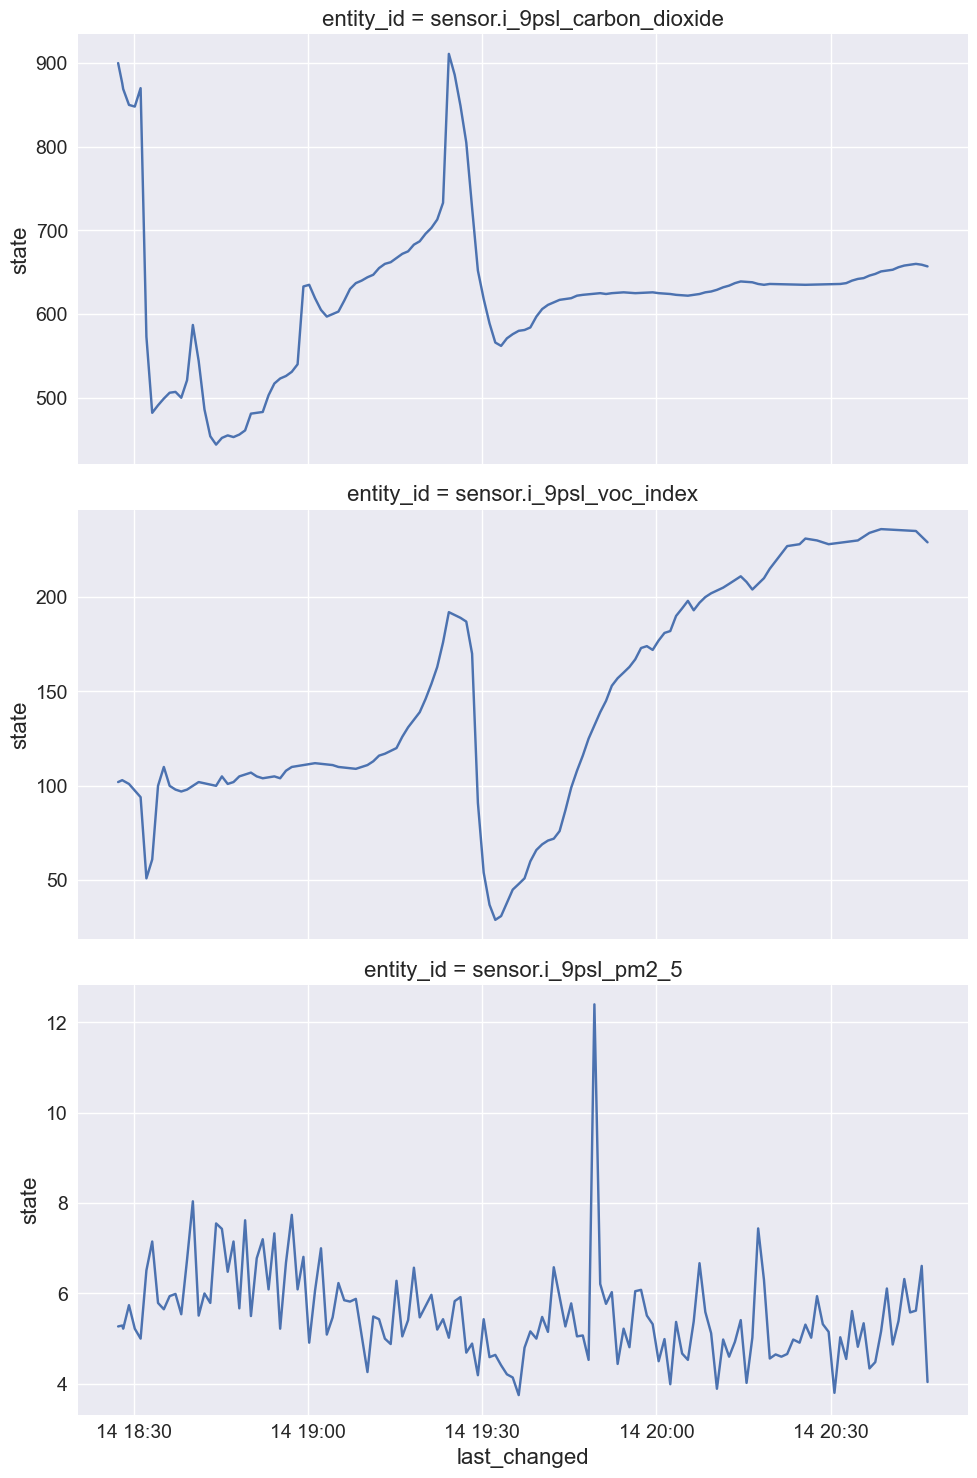

In [12]:
import seaborn as sns
sns.relplot(raw,x='last_changed',y='state',row='entity_id',kind='line',aspect=2,facet_kws={'sharey': False})

In [16]:
import time
from stravalib.client import Client

In [13]:
import requests
requests.get(

In [18]:
client = Client(STRAVA_ACCESS_TOKEN)

ERROR:root:Please make sure your STRAVA_CLIENT_ID is set in your environment.
